In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import os
from tqdm import tqdm

import warnings

import matplotlib.pyplot as plt

from datetime import datetime as dt

warnings.filterwarnings('ignore')

#### 导入数据

In [8]:
train = pd.read_hdf('C:/Users/f3107/Desktop/hy_data/train_3.h5')
#train['datetime'] = pd.to_datetime(train['datetime'],train['delta_time'], format='%m%d %H:%M:%S')

In [10]:
t = train[train['ship_ID']==20]

In [15]:
t['rolling_delta_direction'] = t['delta_direction'].rolling(5).mean()

In [23]:
t['rolling_direction'] = t['direction'].rolling(20).mean()

t['new_delta_direction'] = t['rolling_direction'].diff()
t['new_delta_direction'].fillna(0,inplace=True)
t['new_delta_direction'] = np.sign(t['new_delta_direction'])*(abs(t['new_delta_direction'])-180-np.sign(abs(t['new_delta_direction'])-180)*180)

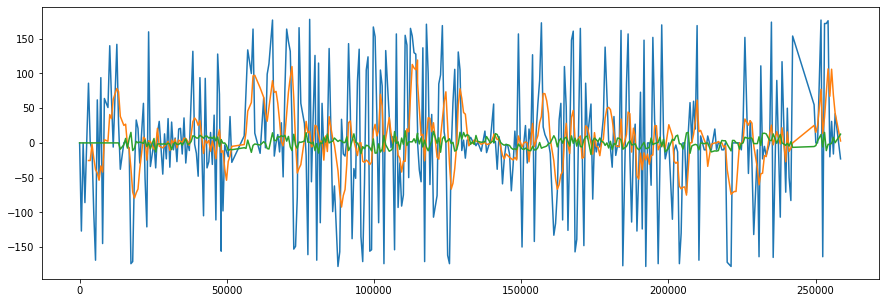

In [27]:
plt.figure(figsize=(15,5))
plt.plot(t.delta_time,t.delta_direction)
plt.plot(t.delta_time,t.rolling_delta_direction)
plt.plot(t.delta_time,t.new_delta_direction)

In [41]:
x = train[train['ship_ID'] == 1335]

In [42]:
x['d_x'] = x['x'].diff()
x['d_y'] = x['y'].diff()
x['d_x'].fillna(0,inplace=True)
x['d_y'].fillna(0,inplace=True)
x['d_xy'] = (x['d_x']**2+x['d_y']**2)**0.5
x.head()

,ship_ID,x,y,speed_v,direction,datetime,type,delta_time,delta_direction,d_x,d_y,d_xy
392,1335,6.155066e+06,4.970023e+06,3.62,40,1900-10-28 00:03:09,拖网,0,0.0,0.000000,0.000000,0.000000
391,1335,6.155896e+06,4.970548e+06,3.18,61,1900-10-28 00:13:01,拖网,592,21.0,830.310215,524.985617,982.356835
390,1335,6.156725e+06,4.970965e+06,3.40,30,1900-10-28 00:22:57,拖网,1188,-31.0,828.724548,416.611123,927.550109
389,1335,6.157454e+06,4.971600e+06,3.40,40,1900-10-28 00:32:59,拖网,1790,10.0,728.919153,635.730647,967.200386
388,1335,6.158080e+06,4.972238e+06,2.59,40,1900-10-28 00:43:03,拖网,2394,0.0,626.049203,637.928666,893.806796


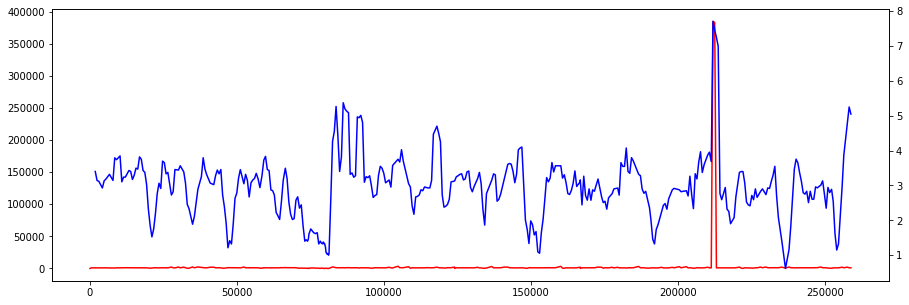

In [43]:
plt.figure(figsize=(15,5))
plt.plot(x.delta_time,x.d_xy,color = 'red')
plt.twinx()
plt.plot(x.delta_time,x.speed_v.rolling(4).mean(),color = 'blue')

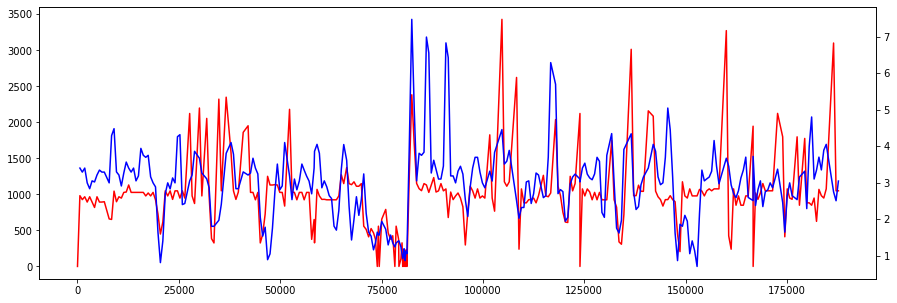

In [45]:
xx = x.loc[:100,:]
plt.figure(figsize=(15,5))
plt.plot(xx.delta_time,xx.d_xy,color = 'red')
plt.twinx()
plt.plot(xx.delta_time,xx.speed_v.rolling(2).mean(),color = 'blue')

In [48]:
x['y'].mean()

4975521.293561318

In [55]:
xxx = x.drop([66,67,68,69,70])

In [51]:
xxx['y'].mean()

4974896.109822545

In [52]:
4975521.293561318-4974896.109822545

625.1837387727574

In [49]:
x.head()

,ship_ID,x,y,speed_v,direction,datetime,type,delta_time,delta_direction,d_x,d_y,d_xy
392,1335,6.155066e+06,4.970023e+06,3.62,40,1900-10-28 00:03:09,拖网,0,0.0,0.000000,0.000000,0.000000
391,1335,6.155896e+06,4.970548e+06,3.18,61,1900-10-28 00:13:01,拖网,592,21.0,830.310215,524.985617,982.356835
390,1335,6.156725e+06,4.970965e+06,3.40,30,1900-10-28 00:22:57,拖网,1188,-31.0,828.724548,416.611123,927.550109
389,1335,6.157454e+06,4.971600e+06,3.40,40,1900-10-28 00:32:59,拖网,1790,10.0,728.919153,635.730647,967.200386
388,1335,6.158080e+06,4.972238e+06,2.59,40,1900-10-28 00:43:03,拖网,2394,0.0,626.049203,637.928666,893.806796


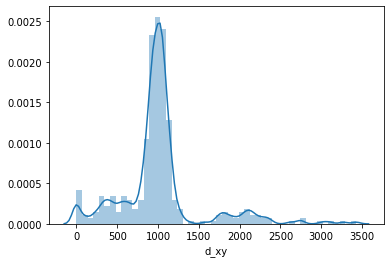

In [56]:
sns.distplot(xxx.d_xy)

In [ ]:
def plot_3(random_train,label):
    
    fig = plt.figure(figsize = (15,8))
    
    L1 = max(random_train.x) - min(random_train.x)
    L2 = max(random_train.y) - min(random_train.y)
    L = max([L1,L2])+10000
    
    ax1 = fig.add_axes([0.05, 0.55, 0.4, 0.4])
    ax2 = fig.add_axes([0.05, 0.05, 0.4, 0.4])
    ax3 = fig.add_axes([0.55, 0.05, 0.4, 0.9], 
                       xlim = (min(random_train.x)-10000,min(random_train.x)+L),
                       ylim = (min(random_train.y)-10000,min(random_train.y)+L)
                      )

    ax1.plot(list(random_train['delta_time']),list(random_train['speed_v']))
    ax1.set_title('speed_v')

    ax2.plot(list(random_train['delta_time']),list(random_train['direction']))
    ax2.set_title('direction')

    ax3.plot(random_train.x,random_train.y)
    
    id = random_train.ship_ID.unique()
    ax3.set_title(label+"_"+str(id))

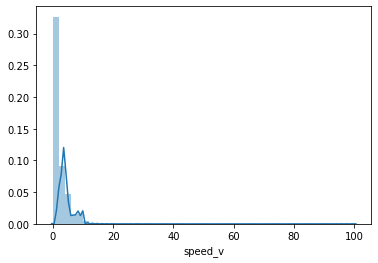

In [58]:
sns.distplot(train.speed_v)

In [65]:
len(train[train.speed_v>20])/len(train)*10000

2.1595487987648716

In [64]:
len(train[train.speed_v>25])/len(train)*10000

0.7371358678459852

In [71]:
train.index[train.speed_v>20]

Int64Index([292,  64,  28, 297,   8,   7,  81, 198, 187,   0,
            ...
            106, 378, 122, 197,  78, 224, 131, 101,  90,  89],
           dtype='int64', length=583)

In [67]:
len(train)

2699638

In [ ]:
plt.plot(train['x'][train['ship']==1029])